In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['student-linear', 'electricity-linear']


## Multiple regression with Gradient Descent

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('../input/student-linear/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


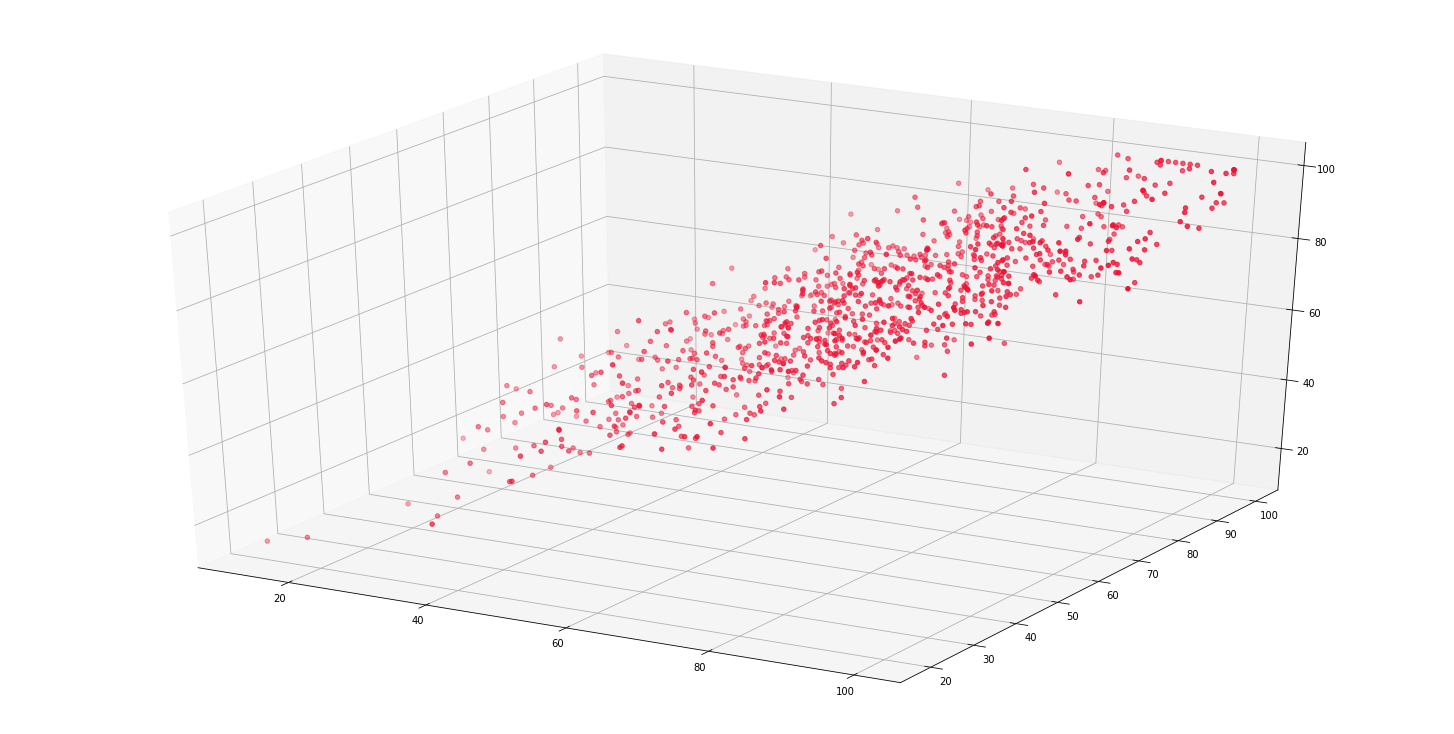

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [4]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [5]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2*m)
    return J

In [6]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [7]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
#         print (gradient[0])
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [8]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 200000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.80486491  0.09290692  0.9044486 ]
10.464353346630046


In [9]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.574790344186286
0.9098151474045942


## SK Learn approach

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


## Break the code to understand each component better

In [11]:
cost_history = [0] * 100000
m = len(Y)

In [12]:
# for iteration in range(iterations):
#     # Hypothesis Values
h = X.dot(B)
# Difference b/w Hypothesis and Actual Y
loss = h - Y
# Gradient Calculation
gradient = X.T.dot(loss) / m
#         print (gradient[0])
B = B - alpha * gradient
cost_function(X, Y, B)

ValueError: shapes (1000,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [13]:
gradient

NameError: name 'gradient' is not defined

In [14]:
B

array([0, 0, 0])

In [15]:
B

array([0, 0, 0])

In [16]:
B

array([0, 0, 0])